## Heatmap
* 히트맵(Heatmap)은 특정 영역의 패턴을 보여주기 위한 목적으로 사용한다.
* 변수간의 관계를 파악할 때 사용합니다. 
* 양의 상관관계
* 0 : 피처간의 관계가 약하다
* 음의 상관관계
* 목표변수(타깃피처)와 설명변수(다른 피처)들 간의 관계를 파악해서, 향후 분석의 의미가 있을까? 검토
* 분석 초기에 데이터 수집이 의미가 있는지, 충분한지 살펴볼 수 있습니다. 
* 관계가 0에 가까운 피처일 경우, 제거할 수 있고..
* 관계가 큰 피처일 경우, 분석과정 전반에 걸쳐 주의하면 살펴볼 피처 대상


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 기본 스타일
## 폰트 설정 및 마이너스 부호 설정
# plt.rc('font', family='NanumSquare') #나눔 글꼴로 설정
plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8

df = pd.read_csv('./data/house-price.csv')
df.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


In [25]:
#피어슨 상관계수
df.corr(numeric_only=True)

,연도,월,분양가
연도,1.000000,-0.234117,0.236611
월,-0.234117,1.000000,-0.000888
분양가,0.236611,-0.000888,1.000000


<Axes: >

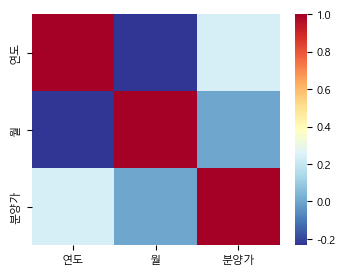

In [26]:
# sns.heatmap(df.corr(),annot=True, annot_kws={'size':7},\
                    # cmap=plt.cm.RdYlBu_r, fmt=".2f", linewidth=.5,vmin=-1.0,square=False)
sns.heatmap(df.corr(numeric_only=True), cmap=plt.cm.RdYlBu_r)

---

<Axes: >

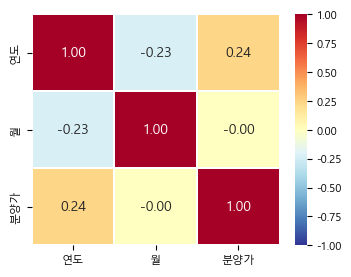

In [33]:
sns.heatmap(df.corr(numeric_only=True), cmap=plt.cm.RdYlBu_r, annot=True, vmin=-1.0, fmt=".2f",
            annot_kws={'size':10}, linewidth=.20, square=False)

In [28]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<Axes: >

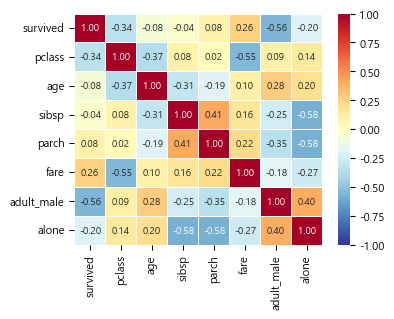

In [32]:
# 타이타닉 데이터에서 생존(Survived)과 가장 상관도가 높은 피처는?

sns.heatmap(titanic.corr(numeric_only=True), cmap=plt.cm.RdYlBu_r, annot=True, vmin=-1.0, fmt=".2f",
            annot_kws={'size':7}, linewidth=.5, square=False)


```
heatmap을 이용한 피처 간 상관관계도를 작성하는 것은 매우 중요함.
```